# Assignment 1

## Data Loading and Preparation

In [4]:
#import needed packages
import numpy as np
import pandas as pd
from sklearn import datasets
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

from matplotlib import pyplot as plt

### Load in the diabetes dataset and construct a panda dataframe with the features and the target. Explore the data to pick a single feature to predict the target.

In [5]:
diabetes = datasets.load_diabetes()
print(diabetes['DESCR'])

.. _diabetes_dataset:

Diabetes dataset
----------------

Ten baseline variables, age, sex, body mass index, average blood
pressure, and six blood serum measurements were obtained for each of n =
442 diabetes patients, as well as the response of interest, a
quantitative measure of disease progression one year after baseline.

**Data Set Characteristics:**

  :Number of Instances: 442

  :Number of Attributes: First 10 columns are numeric predictive values

  :Target: Column 11 is a quantitative measure of disease progression one year after baseline

  :Attribute Information:
      - age     age in years
      - sex
      - bmi     body mass index
      - bp      average blood pressure
      - s1      tc, total serum cholesterol
      - s2      ldl, low-density lipoproteins
      - s3      hdl, high-density lipoproteins
      - s4      tch, total cholesterol / HDL
      - s5      ltg, possibly log of serum triglycerides level
      - s6      glu, blood sugar level

Note: Each of these 1

In [6]:
df = pd.DataFrame(diabetes['data'])
df.columns = diabetes['feature_names']

df['progression'] = diabetes['target']

In [7]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,442.0,-2.511817e-19,0.047619,-0.107226,-0.037299,0.005383,0.038076,0.110727
sex,442.0,1.230790e-17,0.047619,-0.044642,-0.044642,-0.044642,0.050680,0.050680
bmi,442.0,-2.245564e-16,0.047619,-0.090275,-0.034229,-0.007284,0.031248,0.170555
bp,442.0,-4.797570e-17,0.047619,-0.112399,-0.036656,-0.005670,0.035644,0.132044
s1,442.0,-1.381499e-17,0.047619,-0.126781,-0.034248,-0.004321,0.028358,0.153914
s2,442.0,3.918434e-17,0.047619,-0.115613,-0.030358,-0.003819,0.029844,0.198788
s3,442.0,-5.777179e-18,0.047619,-0.102307,-0.035117,-0.006584,0.029312,0.181179
s4,442.0,-9.042540e-18,0.047619,-0.076395,-0.039493,-0.002592,0.034309,0.185234
s5,442.0,9.293722e-17,0.047619,-0.126097,-0.033246,-0.001947,0.032432,0.133597
s6,442.0,1.130318e-17,0.047619,-0.137767,-0.033179,-0.001078,0.027917,0.135612


### Show feature distributions.

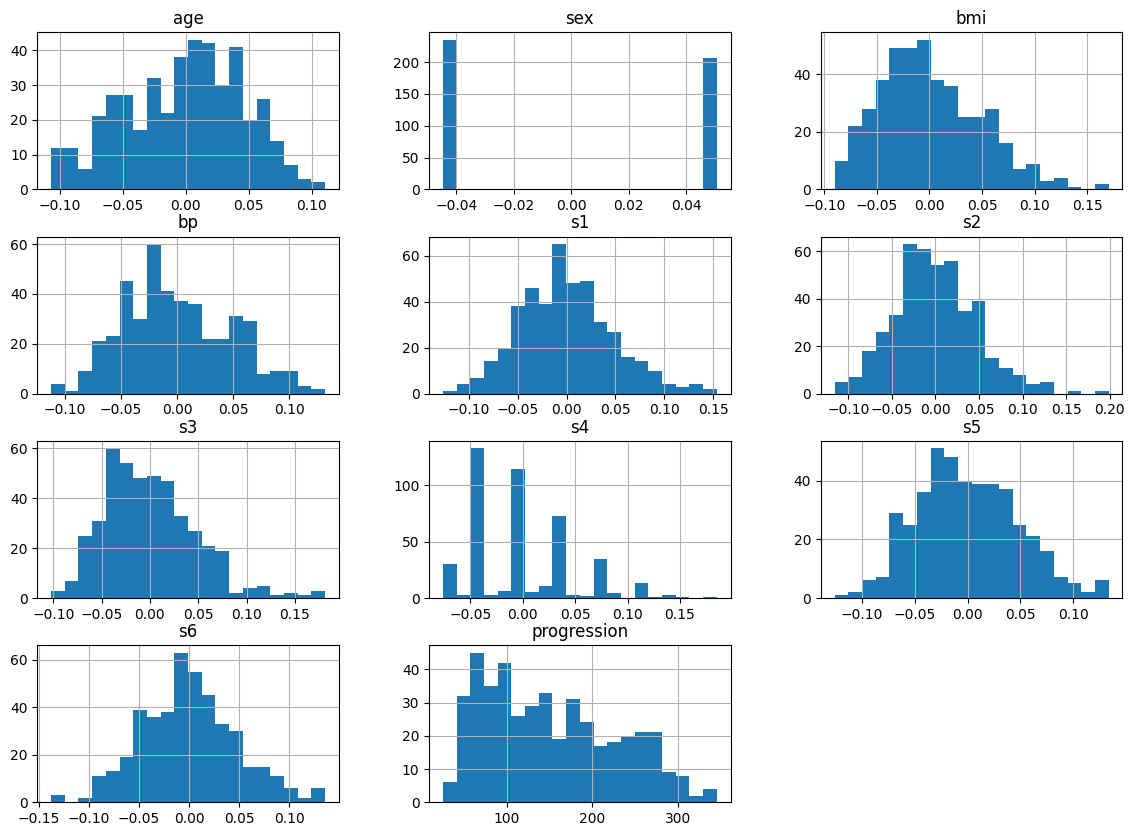

In [8]:
df.hist(bins=20, figsize= (14, 10));

### Calculate correlation value between each feature and target.

In [9]:
df.corr()['progression'].abs().sort_values(ascending=False)

progression    1.000000
bmi            0.586450
s5             0.565883
bp             0.441482
s4             0.430453
s3             0.394789
s6             0.382483
s1             0.212022
age            0.187889
s2             0.174054
sex            0.043062
Name: progression, dtype: float64

In [ ]:
Based on the correlation calculations, I am going to select 'bmi' as the single prediction feature for the linear
regression model as it is the feature with the highest correlation coefficient.

### Create two new dataframes, one for the feature set and one for the target set. Break both sets into training and test sets, with the last 20 rows being in the test set.

In [10]:
X = df[['bmi']]
y = df[['progression']]

X_train = X.iloc[0:-20]
X_test = X.iloc[-20:]

y_train = y.iloc[0:-20]
y_test = y.iloc[-20:]

#confirming correct split
X.count(), X_train.count(), X_test.count()

(bmi    442
 dtype: int64,
 bmi    422
 dtype: int64,
 bmi    20
 dtype: int64)

## Model Training

### Fit Linear Regression model on training data

In [11]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

## Prediction and Measurement

### Use the model to make predictions on the test data, list the first 10 predictions.

In [38]:
preds = model.predict(X_test)

In [39]:
preds[:10]

array([[225.9732401 ],
       [115.74763374],
       [163.27610621],
       [114.73638965],
       [120.80385422],
       [158.21988574],
       [236.08568105],
       [121.81509832],
       [ 99.56772822],
       [123.83758651]])

### Display the feature coefficient and the root mean squared error of the model.

In [41]:
model.coef_, np.sqrt(mean_squared_error(y_test, preds))

(array([[938.23786125]]), 50.478434986892864)

## Visualization

### Scatter plot with regression line.

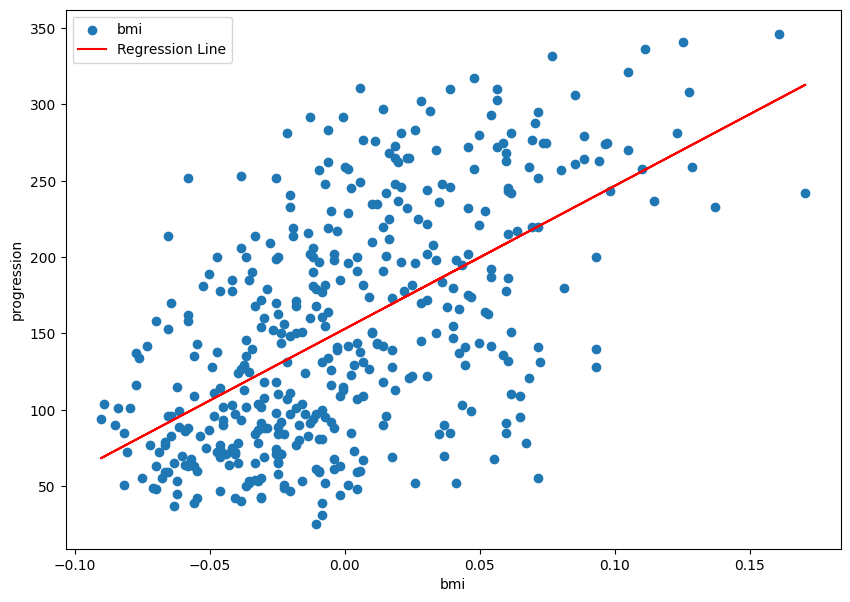

In [43]:
plt.figure(figsize= (10, 7))
plt.scatter(x= X_train, y= y_train, label= 'bmi')
plt.plot(X_train, model.predict(X_train), 'r-', label= 'Regression Line')
plt.xlabel('bmi')
plt.ylabel('progression')
plt.legend()
plt.show()